## Now You Code In Class: Tricks of The DataViz Masters

We will try something a bit different in the Activity - A series of Data Visualization coding challenges!

For this Now You Code, you will need:

    - OpenWeatherMap API key https://openweathermap.org/api (From previous HW)
    - Plotly Credentials  https://developers.zomato.com/api (From Lab) 
    

    


In [104]:
import requests
import geocoder
import matplotlib
import matplotlib.pyplot as plt
import chart_studio as plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import folium
from IPython.display import display

In [105]:
# SET YOUR KEYS AND CREDENTIALS
plotly.tools.set_credentials_file(username='???', api_key='???')
weather_key = '67f9d45c32dd086df27f2b7a90370a8e' # sign up for your own key at https://openweathermap.org/ 

In [106]:
def getWeather(weather_key,location):
    g = geocoder.osm(location)
    query_string = { 'lat' : g.latlng[0], 'lon': g.latlng[1], 'appid' : weather_key, 'units' : 'imperial'}
    url='https://api.openweathermap.org/data/2.5/onecall' 
    response = requests.get(url, params=query_string)
    response.raise_for_status()
    #print (response.url)
    weather = response.json()
    return weather


# Exam Scores Data Set

Load the data

In [107]:
exam_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/exam-scores/exam-scores.csv')
display(exam_df.sample(5))

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
62,M02,D,45,?,?,?,24,80.00%,B
17,M01,C,45,N,Y,Y,23,76.70%,B-
40,M02,B,25,?,?,?,25,83.30%,B
32,M02,A,35,?,?,?,22,73.30%,C+
24,M01,D,40,?,?,?,20,66.70%,C


## Challenge 1

Use `matplotlib` to plot a pie chart of 'Studied In Groups`

HINTS: 
 - You must get `value_counts` of the series, then make a `DataFrame` from it and plot.
 - Plotting help:  `help(df.plot.pie)` where `df` is the dataframe you made.


<AxesSubplot:ylabel='Counts'>

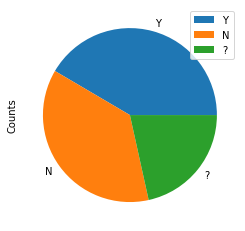

In [108]:
sig = exam_df['Studied_In_Groups'].value_counts()
sig_df = pd.DataFrame( { "SIG" : sig.index, "Counts" : sig })
sig_df.plot.pie(y="Counts")



## Challenge 2

Use `plotly` express to plot the same pie chart of 'Studied In Groups`

HINT: You can use the dataframe from the previous cell. `help(px.pie)` for assistance


In [109]:
px.pie(sig_df, labels='SIG', names="SIG", values='Counts')

## Challenge 3

Use `matplotlib` to plot the grades Student_score as a bar. There should be a bar for each student score.

HINT: `help(exam_df.plot.bar)` for assistance.

<AxesSubplot:>

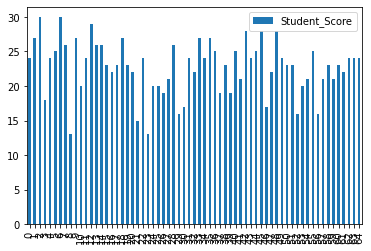

In [110]:
exam_df.plot.bar(y = "Student_Score")

## Challenge 4

Since the last plot was too detailed, use `matplotlib` to plot a histogram of the grades in 9 bins. 

HINT: `help(exam_df.hist)` for assistance.

array([[<AxesSubplot:title={'center':'Student_Score'}>]], dtype=object)

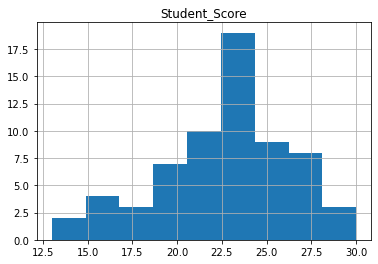

In [111]:
exam_df.hist(column="Student_Score", bins=9)

## Challenge 5

Plot the exact same histogram using plotly express. 

HINT: `help(px.histogram)` for assistance. 

Note (binning algorithm is different)


In [112]:
px.histogram(exam_df, x="Student_Score", nbins=9)

## Challenge 6

Plot a scatter comparing the completion time the exam to the exam score. use `matplotlib`

Note: No correlation will stick out.

<AxesSubplot:xlabel='Completion_Time', ylabel='Student_Score'>

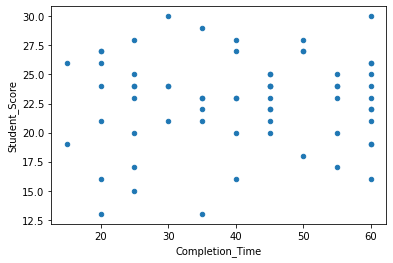

In [113]:
exam_df.plot.scatter(x = "Completion_Time", y = "Student_Score")

## Challenge 7

Plot the same scatter in `plotly express`


In [114]:
px.scatter(exam_df, x = "Completion_Time", y = "Student_Score")

# Weather API Dataset

Load the data 

In [115]:
location = 'Syracuse, NY'
weather = getWeather(weather_key,location)
weather_df = pd.json_normalize(weather['daily'])
display(weather_df.sample(3))

,dt,sunrise,sunset,pressure,humidity,dew_point,wind_speed,wind_deg,weather,clouds,...,temp.day,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn
3,1611421200,1611404870,1611439492,1023,94,13.17,15.32,308,"[{'id': 600, 'main': 'Snow', 'description': 'l...",100,...,17.85,16.21,20.91,16.21,17.82,17.94,3.90,5.95,7.09,4.91
4,1611507600,1611491223,1611525970,1025,91,12.24,6.22,315,"[{'id': 803, 'main': 'Clouds', 'description': ...",54,...,19.33,7.16,19.33,12.63,14.34,7.16,10.58,5.43,8.46,0.09
1,1611248400,1611232160,1611266537,1001,92,28.94,15.61,227,"[{'id': 600, 'main': 'Snow', 'description': 'l...",94,...,33.26,19.29,34.34,30.24,32.47,24.21,20.77,19.78,22.39,12.15


## Challenge 7

Plot a line of daily day temperatures (temp.day) using `matplotlib`

<AxesSubplot:>

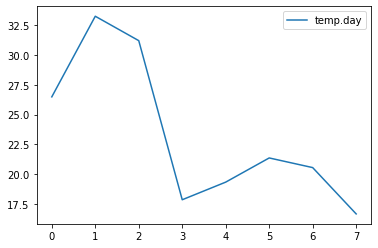

In [116]:
weather_df.plot.line(y = "temp.day")

## Challenge 8

Plot the same line in `plotly express`

In [117]:
px.line(weather_df, y="temp.day")

## Challenge 9 

Let's plot multiple series

Using `matplotlib` plot two series `temp.min` and `temp.max` (both as lines) on the same graph.

HINT: 

 - This is not a one-liner. you must call in the `plt.plot()` method manually, then `display(plt)`
 - Consult the WMC1 example.

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.8/site-packages/matplotlib/pyplot.py'>

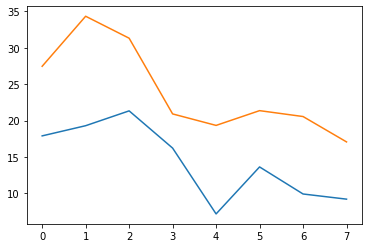

In [118]:
plt.plot(weather_df.index, weather_df['temp.min'])
plt.plot(weather_df.index, weather_df['temp.max'])
display(plt)

## Challenge 10

Plot the same thing using PoP (plain old plotly), similar to the lab example.

HINT: 

 - This is not a one-liner. you must make a figure and `add_trace()` for each series. 
 - Consult the lab. 

In [119]:
figure = go.Figure()
figure.add_trace(go.Line(x = weather_df.index, y = weather_df['temp.min'], name="Lo Temperature"))
figure.add_trace(go.Line(x = weather_df.index, y = weather_df['temp.max'], name="Hi Temperature"))
display(figure.show())

/opt/conda/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




None

## Challenge 12

Create a `folium` map at the geographic center of NY State and place a pin there. The pin should day "This is the center"


HINT: 

 - Get the center here: https://en.wikipedia.org/wiki/List_of_geographic_centers_of_the_United_States
 - Use `folium.Marker` to make the pin, then add to map
 

In [120]:
center = (42.9538,-75.5268)
map = folium.Map(location=center,zoom_start=7)
marker = folium.Marker(location=center, popup="This is the center")
map.add_child(marker)
display(map)

# Cities of New York Dataset

Get it with this code

In [142]:
cities_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/ist256/13-visualization/ny-cities.csv')
cities_df.sample(5)

,location,lat,lng
34,Niagara Falls city,43.09,-79.01
12,Elmira city,42.09,-76.81
15,Glen Cove city,40.89,-73.64
48,Rome city,43.23,-75.49
10,Cortland city,42.60,-76.18


## Challenge 13

Create a `folium` map at the geographic center of NY State and place a pin there. put a red pin on the map for each city in the `cities_df` dataset.


HINT: 

 - Loop over each row in the data frame.
 - create the  `folium.Marker` then add to map
 

In [145]:
center = (42.9538,-75.5268)
map = folium.Map(location=center,zoom_start=7)
marker = folium.Marker(location=center, popup="This is the center")
map.add_child(marker)
for r in cities_df.dropna().to_records():
    marker = folium.Marker(location=(r['lat'],r['lng']), popup=r['location'], icon = folium.Icon(color = "red"))
    map.add_child(marker)
display(map)

In [ ]:
# run this code to turn in your work!
from coursetools.submission import Submission
Submission().submit_now()